In [869]:
import numpy as np
from matplotlib import pyplot as plt

In [870]:
def euclidean_metric(x1, y1, x2, y2):
        return (abs(x1 - x2) ** 2 + abs(y1 - y2) ** 2) ** 0.5

# Реализация k-means с случайным расположением центроид


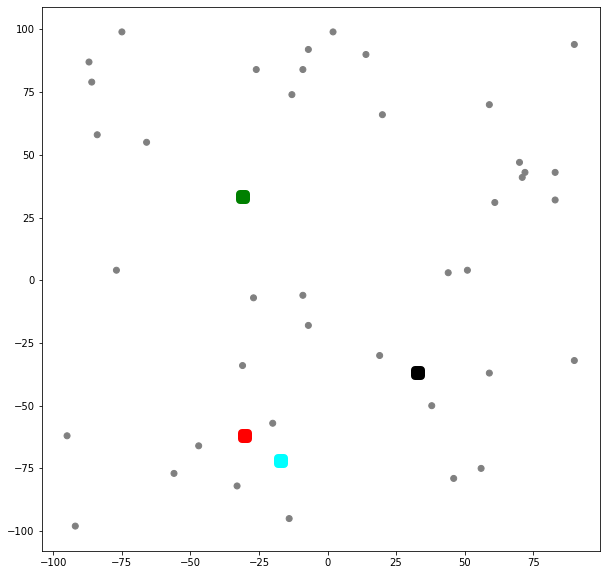

In [871]:
points_amount = 40
clusters_amount = 4
x_coord_max = 100
y_coord_max = 100


point_coord_x = np.array([np.random.randint(low=-x_coord_max, high=x_coord_max) for i in range(points_amount)])
point_coord_y = np.array([np.random.randint(low=-y_coord_max, high=y_coord_max) for i in range(points_amount)])
point_colors = np.array(['grey'] * points_amount, dtype='object')

point_coords = np.array([point_coord_x, point_coord_y]).transpose()


centr_coord_x = np.array([np.random.randint(low=-x_coord_max, high=x_coord_max) for i in range(clusters_amount)])
centr_coord_y = np.array([np.random.randint(low=-y_coord_max, high=y_coord_max) for i in range(clusters_amount)])
centr_colors = np.array(['black', 'red', 'green', 'cyan'], dtype='object')

centr_coords = np.array([centr_coord_x, centr_coord_y]).transpose()


figure, ax = plt.subplots(figsize=(10,10))
plt.scatter(x=point_coords[:, 0], y=point_coords[:, 1], c=point_colors)
plt.scatter(x=centr_coords[:, 0], y=centr_coords[:, 1], c=centr_colors, \
            marker='s', linewidths=8, alpha=1)


### Красим вершины в первый раз

In [872]:
for i in range(points_amount):
    min_distance = euclidean_metric(point_coords[i, 0], point_coords[i, 1], \
                                    centr_coords[0, 0], centr_coords[0, 1])
    min_cluster_index = 0
    
    for j in range(0, clusters_amount):
        if (euclidean_metric(point_coords[i, 0], point_coords[i, 1], \
                             centr_coords[j, 0], centr_coords[j, 1]) < min_distance):
            min_distance = euclidean_metric(point_coords[i, 0], point_coords[i, 1], \
                                            centr_coords[j, 0], centr_coords[j, 1])
            min_cluster_index = j
            
    point_colors[i] = centr_colors[min_cluster_index]

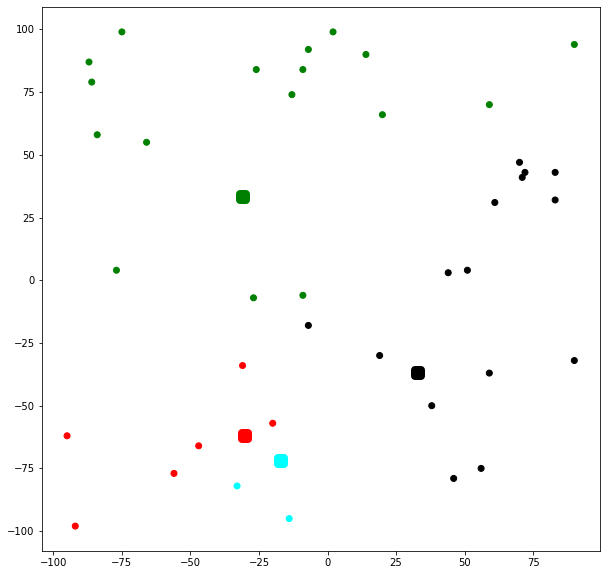

In [873]:
figure, ax = plt.subplots(figsize=(10,10))

plt.scatter(x=point_coords[:, 0], y=point_coords[:, 1], c=point_colors)
plt.scatter(x=centr_coords[:, 0], y=centr_coords[:, 1], c=centr_colors, marker='s', linewidths=8)

### Оставшиеся итерации алгоритма
Будем изменять положение центра до тех пор, пока оно изменяется больше, чем на `difference`, в сравнении с предыдущей итерацией. После того, как мы изменяем положение центров, вновь красим точки.

In [874]:
difference = 1
new_centr_coords = np.copy(centr_coords)
last_centr_coords = np.copy(centr_coords) + 1.5

while not (abs(new_centr_coords - last_centr_coords) < difference).all():
    
    for h in range(clusters_amount):
        last_centr_coords = np.copy(new_centr_coords)
        array_specified_color = point_coords[point_colors == centr_colors[h]]
        new_x, new_y = sum(array_specified_color) / len(array_specified_color)
        new_centr_coords[h] = np.array([new_x, new_y])
        
    for i in range(points_amount):
        min_distance = euclidean_metric(point_coords[i, 0], point_coords[i, 1], \
                                        new_centr_coords[0, 0], new_centr_coords[0, 1])
        min_cluster_index = 0

        for j in range(0, clusters_amount):
            if (euclidean_metric(point_coords[i, 0], point_coords[i, 1], \
                                 new_centr_coords[j, 0], new_centr_coords[j, 1]) < min_distance):
                min_distance = euclidean_metric(point_coords[i, 0], point_coords[i, 1], \
                                                new_centr_coords[j, 0], new_centr_coords[j, 1])
                min_cluster_index = j

        point_colors[i] = centr_colors[min_cluster_index]

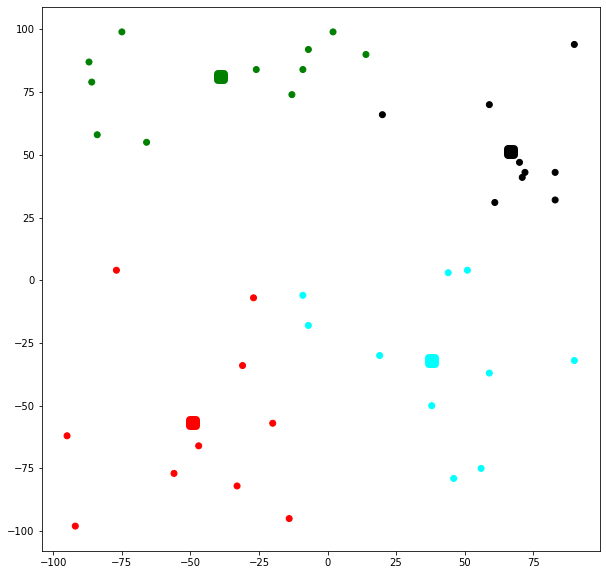

In [875]:
figure, ax = plt.subplots(figsize=(10,10))

plt.scatter(x=point_coords[:, 0], y=point_coords[:, 1], c=point_colors)
plt.scatter(x=new_centr_coords[:, 0], y=new_centr_coords[:, 1], c=centr_colors, marker='s', linewidths=8)

# Реализация k-means++
Первый центроид выбирается случайно из всех точек, остальные будут выбраны так, чтобы расстояние между центроидами было максимальным.
 

In [876]:
points_amount = 40
clusters_amount = 4
x_coord_max = 100
y_coord_max = 100


point_coord_x = np.array([np.random.randint(low=-x_coord_max, high=x_coord_max) for i in range(points_amount)])
point_coord_y = np.array([np.random.randint(low=-y_coord_max, high=y_coord_max) for i in range(points_amount)])
is_centr = np.array([0] * points_amount)
point_colors = np.array(['grey'] * points_amount, dtype='object')


point_data = np.array([point_coord_x, point_coord_y, is_centr]).transpose()
chosen = np.random.randint(low=0, high=points_amount-1)
point_data[chosen][2] = 1
centr_colors = np.array(['black', 'red', 'green', 'cyan'], dtype='object')
index_for_color_pick = 0
point_colors[chosen] = centr_colors[index_for_color_pick]


for i in range(1, clusters_amount):
    index_for_color_pick += 1
    dist_array = np.array([0] * points_amount)
    dist_is_centr_array = np.array([dist_array, point_data[:, 2]]).transpose()
    
    for centroid in point_data[point_data[:,2] == 1,:]:
        
        for j in range(points_amount):
            if dist_is_centr_array[j, 1] == 0:
                dist_is_centr_array[j, 0] += euclidean_metric(centroid[0], centroid[1], \
                                                              point_data[j, 0], point_data[j, 1])

    index_max = np.argmax(dist_is_centr_array[:,0])
    point_data[index_max, 2] = 1
    point_colors[index_max] = centr_colors[index_for_color_pick]

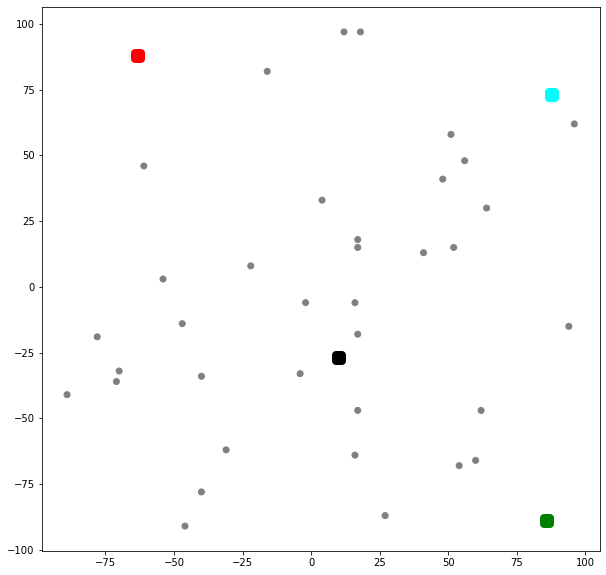

In [877]:
figure, ax = plt.subplots(figsize=(10, 10))

plt.scatter(x=point_data[point_data[:,2] == 0, 0], y=point_data[point_data[:,2] == 0, 1], \
            c=point_colors[point_data[:,2] == 0])
plt.scatter(x=point_data[point_data[:,2] == 1, 0], y=point_data[point_data[:,2] == 1, 1], \
            c=point_colors[point_data[:,2] == 1], marker='s', linewidths=8)

### Красим вершины в первый раз
Сначала отделяю центроиды от остальных точек для того, чтобы использовать код, который был написан выше.

In [878]:
mask = (point_data[:,2] == 1)
simple_point_coords = np.array([point_data[np.logical_not(mask), 0], \
                                point_data[np.logical_not(mask), 1]]).transpose()
simple_point_colors = point_colors[np.logical_not(mask)]

centr_coords = np.array([point_data[(mask), 0], point_data[(mask), 1]]).transpose()
centr_colors = point_colors[mask]

for i in range(points_amount - clusters_amount):
    min_distance = euclidean_metric(simple_point_coords[i, 0], simple_point_coords[i, 1], \
                                    centr_coords[0, 0], centr_coords[0, 1])
    min_cluster_index = 0
    
    for j in range(0, clusters_amount):
        if euclidean_metric(simple_point_coords[i, 0], simple_point_coords[i, 1], \
                             centr_coords[j, 0], centr_coords[j, 1]) < min_distance:
            
            min_distance = euclidean_metric(simple_point_coords[i, 0], simple_point_coords[i, 1], \
                                            centr_coords[j, 0], centr_coords[j, 1])
            min_cluster_index = j
            
    simple_point_colors[i] = centr_colors[min_cluster_index]

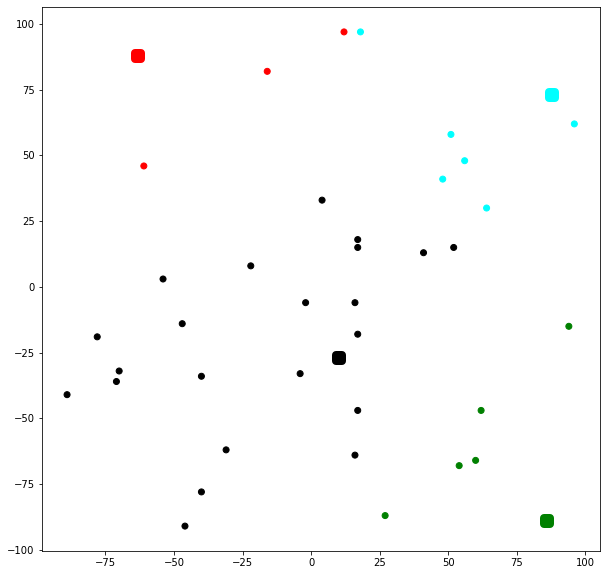

In [879]:
figure, ax = plt.subplots(figsize=(10,10))

plt.scatter(x=simple_point_coords[:, 0], y=simple_point_coords[:, 1], c=simple_point_colors)
plt.scatter(x=centr_coords[:, 0], y=centr_coords[:, 1], c=centr_colors, marker='s', linewidths=8)

### Оставшиеся итерации алгоритма
Полностью повторяется код из реализации обычного k-means, только выделен массив для точек, не являющихся центроидами.

In [880]:
difference = 1
new_centr_coords = np.copy(centr_coords)
last_centr_coords = np.copy(centr_coords) + 1.5

while not (abs(new_centr_coords - last_centr_coords) < difference).all():
    
    for h in range(clusters_amount):
        last_centr_coords = np.copy(new_centr_coords)
        array_specified_color = simple_point_coords[simple_point_colors == centr_colors[h]]
        new_x, new_y = sum(array_specified_color) / len(array_specified_color)
        new_centr_coords[h] = np.array([new_x, new_y])
        
    for i in range(points_amount - clusters_amount):
        min_distance = euclidean_metric(simple_point_coords[i, 0], simple_point_coords[i, 1], \
                                        new_centr_coords[0, 0], new_centr_coords[0, 1])
        min_cluster_index = 0
        
        for j in range(0, clusters_amount):
            if (euclidean_metric(simple_point_coords[i, 0], simple_point_coords[i, 1], \
                                 new_centr_coords[j, 0], new_centr_coords[j, 1]) < min_distance):
                min_distance = euclidean_metric(simple_point_coords[i, 0], simple_point_coords[i, 1], \
                                                new_centr_coords[j, 0], new_centr_coords[j, 1])
                min_cluster_index = j

        simple_point_colors[i] = centr_colors[min_cluster_index]

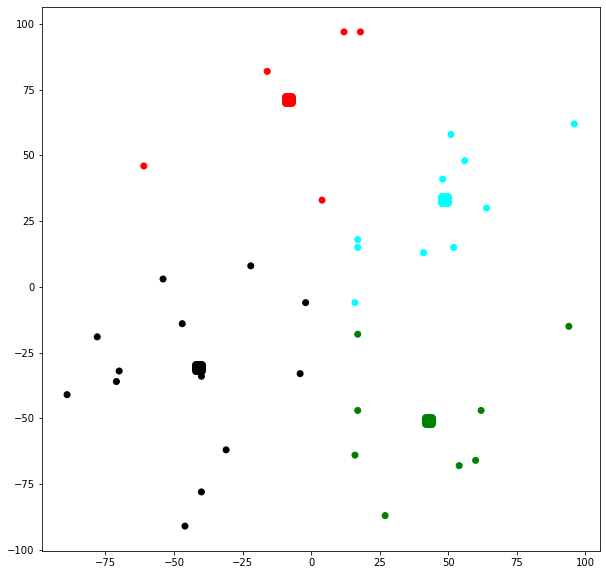

In [881]:
figure, ax = plt.subplots(figsize=(10,10))

plt.scatter(x=simple_point_coords[:, 0], y=simple_point_coords[:, 1], c=simple_point_colors)
plt.scatter(x=new_centr_coords[:, 0], y=new_centr_coords[:, 1], c=centr_colors, marker='s', linewidths=8)